# Mall Customers Clustering

In [2]:
# Library
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [3]:
# Define Dataset
X,__=make_classification(n_samples=1000, n_features=2, n_informative=2,
n_redundant=0, n_clusters_per_class=1, random_state=4)

In [4]:
X

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

In [5]:
# Define The Model
model=KMeans(n_clusters=2, random_state=4)

In [6]:
# Fit The Model
model.fit(X)

KMeans(n_clusters=2, random_state=4)

In [7]:
# Cluster Centroid
print(model.cluster_centers_)

[[ 0.89911301 -0.31643189]
 [-0.87932686 -1.61020833]]


In [8]:
# Assign a Cluster To Each Sample
label=model.predict(X)

In [9]:
# Retrive Unique Clusters
clusters=unique(label)
clusters

array([0, 1])

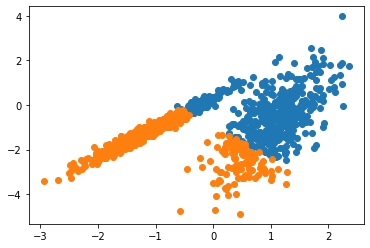

In [10]:
# Create Scatter Plot for Samples from Each Cluster
for cluster in clusters:
    # Get Row Indexes for Samples with This Cluster
    row_ix=where(label==cluster)
    # Create Scatter of These Samples
    pyplot.scatter(X[row_ix,0],X[row_ix,1])
# Show The Plot
pyplot.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Import Dataset 'Mall_Customers.csv'
dataset=pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Feature "Annual Income" and "Spending Score"
X = dataset.iloc[:, 3:5]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
# Ukuran Data (Baris,Kolom)
X.shape

(200, 2)

In [15]:
# Cek Data Missing
X.isnull().sum() #jika 0 maka tidak ada data missing

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# Ringkasan Data
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [17]:
wcss=[] #Within Cluster Sum of Squares
for i in range(1, 15):
    kmeans=KMeans(n_clusters=i, random_state=14)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\lenovo\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


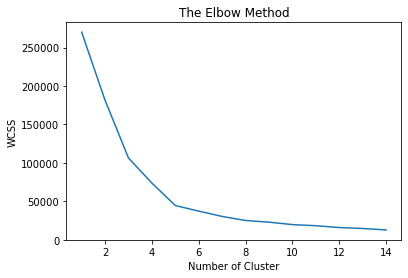

In [18]:
# Visualisasi Metode Elbow
plt.plot (range(1,15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [23]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


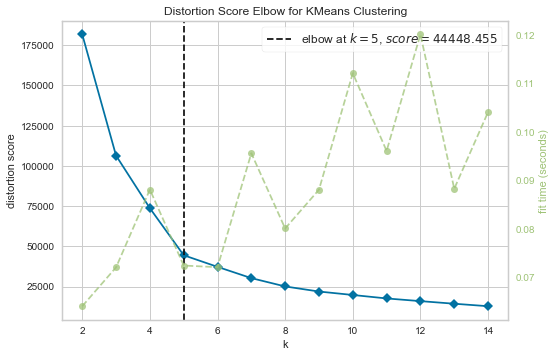

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M=KElbowVisualizer(KMeans(),k=14)
Elbow_M.fit(X)
Elbow_M.show()

In [20]:
# Cluster=5
kmeans=KMeans(n_clusters=5, random_state=14)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=14)

In [21]:
kmeans.labels_ # Cara Lain: y_pred = kmeans.fit_predict(X)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [22]:
hasil_kmeans=X.copy()
hasil_kmeans["Cluster"]=kmeans.labels_
hasil_kmeans.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [23]:
# Nilai untuk sumbu X dan Y
cluster_x= hasil_kmeans["Cluster"].value_counts().index
cluster_y= hasil_kmeans["Cluster"].value_counts().values

C:\Users\lenovo\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

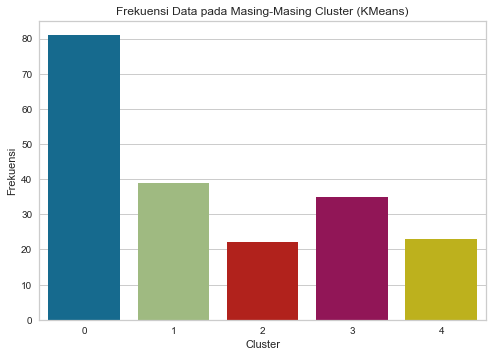

In [24]:
# Visualisasi
sns.barplot(cluster_x, cluster_y)
plt.title("Frekuensi Data pada Masing-Masing Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")
plt.show

In [25]:
# Nilai Fitur/Variabel dari Masing-Masing Cluster
ann_kmeans0= hasil_kmeans[hasil_kmeans["Cluster"]==0].iloc[:,0]
spend_kmeans0= hasil_kmeans[hasil_kmeans["Cluster"]==0].iloc[:,1]

ann_kmeans1= hasil_kmeans[hasil_kmeans["Cluster"]==1].iloc[:,0]
spend_kmeans1= hasil_kmeans[hasil_kmeans["Cluster"]==1].iloc[:,1]

ann_kmeans2= hasil_kmeans[hasil_kmeans["Cluster"]==2].iloc[:,0]
spend_kmeans2= hasil_kmeans[hasil_kmeans["Cluster"]==2].iloc[:,1]

ann_kmeans3= hasil_kmeans[hasil_kmeans["Cluster"]==3].iloc[:,0]
spend_kmeans3= hasil_kmeans[hasil_kmeans["Cluster"]==3].iloc[:,1]

ann_kmeans4= hasil_kmeans[hasil_kmeans["Cluster"]==4].iloc[:,0]
spend_kmeans4= hasil_kmeans[hasil_kmeans["Cluster"]==4].iloc[:,1]

In [26]:
# Pusat dari Cluster (Centroid)
centroid_cluster=kmeans.cluster_centers_
centroid_cluster

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

<function matplotlib.pyplot.show(close=None, block=None)>

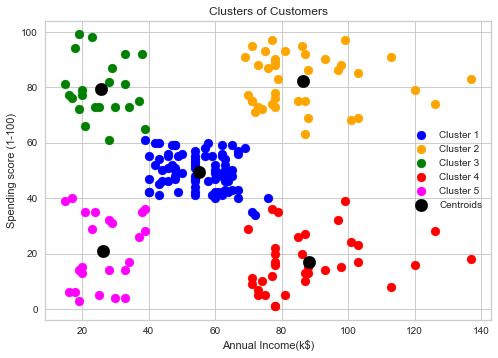

In [27]:
# Visualisasi Hasil Clustering
plt.scatter(ann_kmeans0, spend_kmeans0, s=80, c='blue', label='Cluster 1')
plt.scatter(ann_kmeans1, spend_kmeans1, s=80, c='orange', label='Cluster 2')
plt.scatter(ann_kmeans2, spend_kmeans2, s=80, c='green', label='Cluster 3')
plt.scatter(ann_kmeans3, spend_kmeans3, s=80, c='red', label='Cluster 4')
plt.scatter(ann_kmeans4, spend_kmeans4, s=80, c='magenta', label='Cluster 5')
#Centroid
plt.scatter(centroid_cluster[:,0], centroid_cluster[:,1], s=160, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score (1-100)")
plt.legend()
plt.show

In [28]:
dataset['cluster']=kmeans.labels_
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [29]:
dataset.to_excel("Clustering_K-Means.xlsx", sheet_name='K-Means', index=False)

C:\Users\lenovo\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

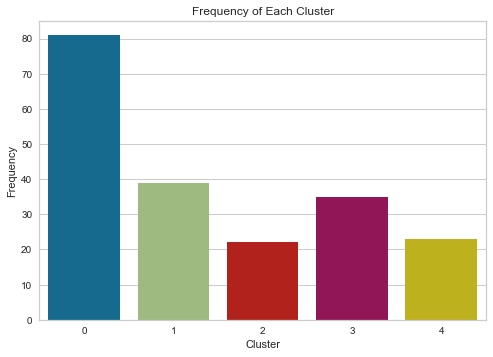

In [31]:
# Visualisasi
sns.barplot(cluster_x, cluster_y)
plt.title("Frequency of Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show